# Network Analysis with Python 2

You'll gain the conceptual and practical skills to analyze evolving time series of networks, learn about bipartite graphs, and how to use bipartite graphs in product recommendation systems. You'll also learn about graph projections, why they're so useful in Data Science, and figure out the best ways to store and load graph data from files.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import networkx as nx

import numpy as np
import pandas as pd

path = 'data/dc24/'

## Definitions and Recap

<img src="images/graphs201.png" alt="" style="width: 400px;"/>

<img src="images/graphs202.png" alt="" style="width: 400px;"/>


In [ ]:
# Add the degree centrality score of each node to their metadata dictionary
dcs = nx.degree_centrality(G)
for n in G.nodes():
    G.node[n]['centrality'] = dcs[n]

## Bipartite graphs

<img src="images/graphs203.png" alt="" style="width: 400px;"/>

<img src="images/graphs204.png" alt="" style="width: 400px;"/>

<img src="images/graphs205.png" alt="" style="width: 400px;"/>

<img src="images/graphs206.png" alt="" style="width: 400px;"/>


In [5]:
# https://networkx.github.io/documentation/stable/reference/readwrite/yaml.html
#nx.write_yaml(G, 'path_for_yaml_file')

# https://networkx.github.io/documentation/stable/reference/readwrite/gexf.html
# nx.write_gexf(G, 'file_name')

In [6]:
G = nx.read_gexf(path+'G.xml')

In [7]:
type(G.edges())

networkx.classes.reportviews.EdgeView

## The bipartite keyword

The `'bipartite'` keyword is part of a `node's metadata dictionary`, and can be assigned both when you add a node and after the node is added. Remember, though, that by definition, in a **bipartite graph**, `a node cannot be connected to another node in the same partition`.

Here, you're going to write a function that returns the nodes from a given partition in a **bipartite graph**. In this case, the relevant partitions of the Github bipartite graph you'll be working with are 'projects' and 'users'.

- Write a function called `get_nodes_from_partition()` which accepts two arguments - a bipartite graph G and a partition of G - and returns just the nodes from that partition.
    - Iterate over all the nodes of G (not including the metadata) using a for loop.
    - Access the `'bipartite'` keyword of the current node's metadata dictionary. If it equals partition, append the current node to the list nodes.
- Use your `get_nodes_from_partition()` function together with the `len()` function to:
    - Print the number of nodes in the 'projects' partition of G.
    - Print the number of nodes in the 'users' partition of G.

In [8]:
# Define get_nodes_from_partition()
def get_nodes_from_partition(G, partition):
    # Initialize an empty list for nodes to be returned
    nodes = []
    # Iterate over each node in the graph G
    for n in G.nodes():
        # Check that the node belongs to the particular partition
        if G.node[n]['bipartite'] == partition:
            # If so, append it to the list of nodes
            nodes.append(n)
    return nodes

In [9]:
# Print the number of nodes in the 'projects' partition
print(len(get_nodes_from_partition(G, 'projects')))

# Print the number of nodes in the 'users' partition
print(len(get_nodes_from_partition(G, 'users')))

11774
10677


## Degree centrality distribution of user nodes

In this exercise and the next one, you're going to do a final recap of material from the previous course. Your task is to plot the **degree centrality distributions** for each node partition in the **bipartite** version of the GitHub collaboration network. Here, you'll do this for the `'users'` partition. In the next exercise, you'll do this for the `'projects'` partition.

The function you wrote before, `get_nodes_from_partition()`, has been loaded for you. Just to remind you, the **"degree centrality"** `is a measure of node importance`, and the **"degree centrality distribution"** `is the list of degree centrality scores for all nodes in the graph`.

- Import matplotlib.pyplot as plt.
- Use your `get_nodes_from_partition()` function from the previous exercise to get a list called user_nodes corresponding to the 'users' nodes of G.
- Using the `nx.degree_centrality()` function, compute the degree centralities for each node in G. Store the result as `dcs`.
- Use a list comprehension to compute the degree centralities for each node in `user_nodes`. Store the result as `user_dcs`.
    - Remember, `dcs` is a dictionary, in which the keys are the nodes. The relevant nodes here are contained in `user_nodes`. How can you use this information to obtain the degree centralities of the user nodes? Use n as your iterator variable.
- Plot a histogram of the degree distribution of users, using `plt.hist()` and `user_dcs`.

In [10]:
# Get the 'users' nodes: user_nodes
user_nodes = get_nodes_from_partition(G, 'users')

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(G)

In [11]:
user_nodes[:10]

['u10002',
 'u21097',
 'u24070',
 'u31908',
 'u3885',
 'u5520',
 'u19224',
 'u16890',
 'u8121',
 'u753']

In [12]:
dict(list(dcs.items())[0:2])

{'u10002': 4.4543429844097995e-05, 'u21097': 4.4543429844097995e-05}

In [13]:
# Get the degree centralities for user_nodes: user_dcs
user_dcs = [dcs[n] for n in user_nodes]

In [14]:
user_dcs[:10]

[4.4543429844097995e-05,
 4.4543429844097995e-05,
 8.908685968819599e-05,
 4.4543429844097995e-05,
 0.00017817371937639198,
 0.00013363028953229398,
 4.4543429844097995e-05,
 4.4543429844097995e-05,
 4.4543429844097995e-05,
 4.4543429844097995e-05]

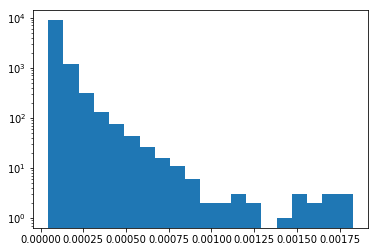

In [15]:
# Plot the degree distribution of users_dcs
plt.yscale('log')
plt.hist(user_dcs, bins=20)
plt.show();

## Degree centrality distribution of project nodes

Now it's time to plot the **degree cenrality distribution** for the 'projects' partition of G. The steps to do this are exactly the same as in the previous exercise.

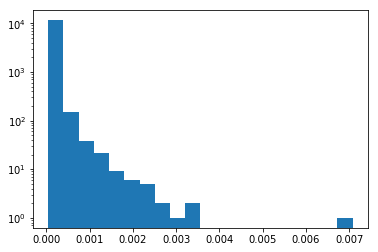

In [16]:
project_nodes = get_nodes_from_partition(G, 'projects')
project_dcs = [dcs[n] for n in project_nodes]
plt.yscale('log')
plt.hist(project_dcs, bins=20)
plt.show();

## Bipartite graphs and recommendation systems

<img src="images/graphs207.png" alt="" style="width: 400px;"/>


## Shared nodes in other partition

In order to build up your concept of **recommendation systems**, we are going to start with the fundamentals. The focus here is on `computing user similarity in bipartite graphs`.

Your job is to write a function that takes in two nodes, and returns the set of repository nodes that are shared between the two user nodes.

You'll find the following methods and functions helpful in this exercise - `.neighbors()`, `set()`, and `.intersection()` - besides, of course, the `shared_partition_nodes` function that you will define!

- Write a function called `shared_partition_nodes()` that takes in 3 arguments - a graph G, node1, and node2 - and returns the set of nodes that are shared between node1 and node2.
    - Check that node1 and node2 belong to the same partition using an assert statement and the 'bipartite' keyword.
    - Obtain the neighbors of node1 and store them as nbrs1.
    - Obtain the neighbors of node2 and store them as nbrs2.
- Compute the overlap between nbrs1 and nbrs2 using the set `.intersection()` method.
- Print the number of shared repositories between users 'u7909' and 'u2148' using your shared_partition_nodes() function together with the len() function.

In [17]:
def shared_partition_nodes(G, node1, node2):
    # Check that the nodes belong to the same partition
    assert G.node[node1]['bipartite'] == G.node[node2]['bipartite']

    # Get neighbors of node 1: nbrs1
    nbrs1 = G.neighbors(node1)
    # Get neighbors of node 2: nbrs2
    nbrs2 = G.neighbors(node2)

    # Compute the overlap using set intersections
    overlap = set(nbrs1).intersection(nbrs2)
    return overlap

In [18]:
# Print the number of shared repositories between users 'u7909' and 'u2148'
print(len(shared_partition_nodes(G, 'u7909', 'u2148')))

3


## User similarity metric

Having written a function to calculate the set of nodes that are shared between two nodes, you're now going to `write a function to compute a metric of similarity between two users`: the number of projects shared between two users divided by the total number of nodes in the other partition. This can then be used to find users that are similar to one another.

- Complete the `user_similarity()` function to calculate the similarity between user1 and user2.
    - Use assert statements to check that user1 and user2 belong to the 'users' partition.
    - Use your `shared_partition_nodes()` function from the previous exercise to get the set of nodes shared between the two users user1 and user2.
    - Return the fraction of nodes in the projects partition. That is, divide the number of shared_nodes by the total number of nodes in the 'projects' partition.
- Compute the similarity score between users 'u4560' and 'u1880'. To do this:
    - First obtain the nodes in the 'projects' partition using your `get_nodes_from_partition()` function.
    - Then use your `user_similarity()` function to compute the score.

In [19]:
def user_similarity(G, user1, user2, proj_nodes):
    # Check that the nodes belong to the 'users' partition
    assert G.node[user1]['bipartite'] == 'users'
    assert G.node[user2]['bipartite'] == 'users'

    # Get the set of nodes shared between the two users
    shared_nodes = shared_partition_nodes(G, user1, user2)

    # Return the fraction of nodes in the projects partition
    return len(shared_nodes) / len(proj_nodes)

In [20]:
# Compute the similarity score between users 'u4560' and 'u1880'
project_nodes = get_nodes_from_partition(G, 'projects')
similarity_score = user_similarity(G, 'u4560', 'u1880', project_nodes)

print(similarity_score)

0.0


It looks like these two users are not very similar!

## Find similar users

You're now going to build upon what you've learned so far to write a function called `most_similar_users()` that finds the users most similar to another given user.

The beginnings of this function have been written for you. A list of nodes, `user_nodes` has been created, which contains all of the users except the given user that has been passed into the function. Your task is to complete the function such that it finds the users most similar to this given user. You'll make use of your `user_similarity()` function from the previous exercise to help do this.

A dictionary called `similarities` has been setup, in which the keys are the scores and the list of values are the nodes.

- Iterate over user_nodes and compute the similarity between user and each user_node (n) using your user_similarity() function. Store the result as similarity.
- Append the score and node to the similarities dictionary. The key is the score - similarity - and the value is the node - n.
- Compute the maximum similarity score. To do this, first access the keys (which contain the scores) of similarities using the .keys() method and then use the max() function. Store the result as max_similarity.
- Return the list of users that share maximal similarity. This list of users is the value of the max_similarity key of similarities.
- Use your most_similar_users() function to print the list of users most similar to the user 'u4560'.

In [21]:
from collections import defaultdict

def most_similar_users(G, user, user_nodes, proj_nodes):
    # Data checks
    assert G.node[user]['bipartite'] == 'users'

    # Get other nodes from user partition
    user_nodes = set(user_nodes)
    user_nodes.remove(user)
    
    #print(len(user_nodes))

    # Create the dictionary: similarities
    similarities = defaultdict(list)
    for n in user_nodes:
        similarity = user_similarity(G, user, n, proj_nodes)
        similarities[similarity].append(n)
        
        #print(similarity)

    # Compute maximum similarity score: max_similarity
    max_similarity = max(similarities.keys())

    # Return list of users that share maximal similarity
    return similarities[max_similarity], similarities

In [22]:
user_nodes = get_nodes_from_partition(G, 'users')
project_nodes = get_nodes_from_partition(G, 'projects')

similar_users, similarities = most_similar_users(G, 'u4560', user_nodes, project_nodes)

print(similar_users)

['u14984', 'u9525', 'u53', 'u1570', 'u2800', 'u363']


In [23]:
similarities.keys()

dict_keys([0.0, 8.493290300662476e-05])

In [24]:
similarities[8.493290300662476e-05]

['u14984', 'u9525', 'u53', 'u1570', 'u2800', 'u363']

## Recommend repositories

Here, the task is to practice using set differences, and you'll apply it to recommending repositories from a second user that the first user should contribute to.

- Write a function called `recommend_repositories()` that accepts 3 arguments - G, from_user, and to_user - and returns the repositories that the from_user is connected to that the to_user is not connected to.
    - Get the set of repositories the from_user has contributed to and store it as from_repos. To do this, first obtain the neighbors of from_user and use the set() function on this.
    - Get the set of repositories the to_user has contributed to and store it as to_repos.
    - Using the `.difference()` method, return the repositories that the from_user is connected to that the to_user is not connected to.
- Print the repositories to be recommended from 'u7909' to 'u2148'.

In [25]:
def recommend_repositories(G, from_user, to_user):
    # Get the set of repositories that from_user has contributed to
    from_repos = set(G.neighbors(from_user))
    # Get the set of repositories that to_user has contributed to
    to_repos = set(G.neighbors(to_user))

    # Identify repositories that the from_user is connected to that the to_user is not connected to
    return from_repos.difference(to_repos)

In [26]:
# Print the repositories to be recommended
print(recommend_repositories(G, 'u7909', 'u2148'))

{'p7408', 'p32418', 'p9312', 'p66'}


## Reading graphs

In this exercise, before you compute projections, you're going to practice working with one of NetworkX's disk I/O functions, `read_edgelist()`. `read_edgelist()` creates a graph from the edgelist file. The graph that you'll be working with is a bipartite graph describing the American Revolution. There are two node partitions - `'people'` and `'clubs'`, and edges denote a person being a member of a club.

In [27]:
# Import networkx
import networkx as nx

# Read in the data: g
G = nx.read_edgelist(path+'american-revolution.edgelist')

# Assign nodes to 'clubs' or 'people' partitions
# In the dataset, 'clubs' do not have a . symbol in their node name. 
#  Use this information to assign nodes to 'clubs' or 'people' partitions.
for n, d in G.nodes(data=True):
    if '.' in n:
        G.node[n]['bipartite'] = 'people'
    else:
        G.node[n]['bipartite'] = 'clubs'
        
# Print the edges of the graph
print(list(G.edges(data=True))[:1])

[('Bruce.Stephen', 'TeaParty', {'weight': 1})]


## Projections

<img src="images/graphs208.png" alt="" style="width: 400px;"/>

<img src="images/graphs209.png" alt="" style="width: 400px;"/>

<img src="images/graphs210.png" alt="" style="width: 400px;"/>

<img src="images/graphs211.png" alt="" style="width: 400px;"/>


## Computing projection

It's now time to try your hand at `computing the projection of a bipartite graph to the nodes on one of its partitions`. This will help you gain practice with `converting between a bipartite version of a graph and its unipartite projections`. The **"projection" of a graph onto one of its partitions** is the connectivity of the nodes in that partition conditioned on connections to nodes on the other partition. Made more concretely, you can think of the "connectivity of customers based on shared purchases".

To help you get started, here's a hint on list comprehensions. List comprehensions can include conditions, so if you want to filter a graph for a certain type of node, you can do: `[n for n, d in G.nodes(data=True) if d['key'] == 'some_value']`.

- Prepare the people nodelist using a list comprehension. If the 'bipartite' keyword of a node n in G equals 'people', then that node should be part of the nodelist.
- Prepare the clubs nodelist by iterating over the nodes of G, including the metadata. Here, note that you have to check if the 'bipartite' keyword of the metadata dictionary d equals 'clubs'. Note: This is simply an alternate way of creating the nodelist. You do not have to iterate over the metadata - you can follow the same approach you used to create the people nodelist, simply checking for 'clubs' instead. We're asking you to use the other approach here so you get practice with both.
- Use `nx.bipartite.projected_graph()` to compute the people and clubs projections. Store the results as `peopleG` and `clubsG`.
    - This function takes in two arguments: The graph G, and the nodelist.

In [28]:
# Prepare the nodelists needed for computing projections: people, clubs
people = [n for n in G.nodes() if G.node[n]['bipartite'] == 'people']
clubs = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'clubs']

# Compute the people and clubs projections: peopleG, clubsG
peopleG = nx.bipartite.projected_graph(G, people)
clubsG = nx.bipartite.projected_graph(G, clubs)

## Plot degree centrality on projection

Here, you're going to compare the **degree centrality distributions** for each of the following graphs: the original graph G, the people graph projection peopleG, and the clubs graph projection clubsG. This will reinforce the difference in **degree centrality score** computation between bipartite and unipartite versions of degree centrality metrics.

Recall that the bipartite functions require passing in a container of nodes, but will return all degree centrality scores nonetheless.

- Plot the **degree centrality distribution** of the original graph G, using the **degree_centrality** function from the bipartite module: `nx.bipartite.degree_centrality()`. It takes in two arguments: The graph G, and one of the node lists (people or clubs).
- Plot the **degree centrality distribution** of the peopleG graph, using the normal/non-bipartite **degree_centrality** function from NetworkX: `nx.degree_centrality()`.
- Plot the **degree centrality distribution** of the clubsG graph, using the normal/non-bipartite **degree_centrality** function from NetworkX: `nx.degree_centrality()`.
- In your calls to plt.hist(), remember to first use the `.values()` method on computed degree centralities and convert them into a list.

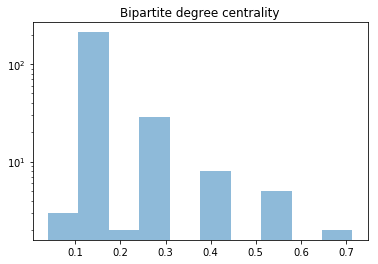

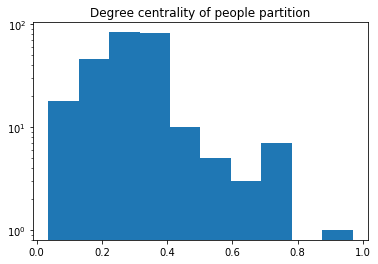

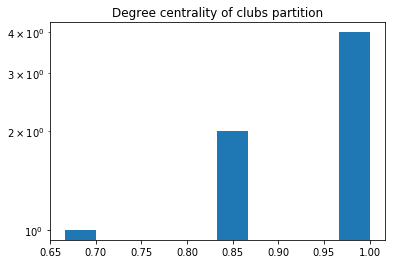

In [29]:
import matplotlib.pyplot as plt 

# Plot the degree centrality distribution of both node partitions from the original graph
plt.figure()
original_dc = nx.bipartite.degree_centrality(G, people)
plt.hist(list(original_dc.values()), alpha=0.5)
plt.yscale('log')
plt.title('Bipartite degree centrality')
plt.show();

# Plot the degree centrality distribution of the peopleG graph
plt.figure()  
people_dc = nx.degree_centrality(peopleG)
plt.hist(list(people_dc.values()))
plt.yscale('log')
plt.title('Degree centrality of people partition')
plt.show();

# Plot the degree centrality distribution of the clubsG graph
plt.figure() 
clubs_dc = nx.degree_centrality(clubsG)
plt.hist(list(clubs_dc.values()))
plt.yscale('log')
plt.title('Degree centrality of clubs partition')
plt.show();

Note that the distributions are quite different from one another. The disjoint histogram from the clubsG graph stems from its small number of nodes (only 7), while the peopleG histogram is more contiguous because of the large number of nodes in there. The bipartite degree centrality histogram has discrete values: this again stems from having only a small number of clubs nodes that the people nodes can connect to.

## Bipartite graphs as matrices and Matrix Multiplication in Python (>=3.5)

<img src="images/graphs212.png" alt="" style="width: 400px;"/>

<img src="images/graphs213.png" alt="" style="width: 400px;"/>

<img src="images/graphs214.png" alt="" style="width: 400px;"/>

<img src="images/graphs215.png" alt="" style="width: 400px;"/>

<img src="images/graphs216.png" alt="" style="width: 400px;"/>

<img src="images/graphs217.png" alt="" style="width: 400px;"/>

<img src="images/graphs218.png" alt="" style="width: 400px;"/>

<img src="images/graphs219.png" alt="" style="width: 400px;"/>


## Properties of bipartite adjacency matrices

Let's recap concepts about bipartite graphs and their adjacency matrices. Which of the following statements best describes **bipartite adjacency matrices**?

- Bipartite graph adjacency matrices are often sparse and symmetric.
- Bipartite graph adjacency matrices are always square.
- Bipartite graph adjacency matrices are often asymmetric. (correct)
- Bipartite graph adjacency matrices are densely populated.

**Bipartite graph adjacency matrices** are often asymmetric because there are more ways to construct an asymmetric bipartite graph than a symmetric one.

## Compute adjacency matrix

Now, you'll get some practice using matrices and sparse matrix multiplication to compute projections! In this exercise, you'll use the **matrix multiplication operator** `@` that was introduced in Python 3.5.

You'll continue working with the American Revolution graph. The two partitions of interest here are `'people'` and `'clubs'`.

- Get the list of people and list of clubs from the graph G using the `get_nodes_from_partition()` function that you defined earlier. This function accepts two parameters: A graph, and a partition.
- Compute the **biadjacency matrix** using `nx.bipartite.biadjacency_matrix()`, setting the row_order parameter to people_nodes and the column_order parameter to clubs_nodes. Remember to also pass in the graph G.
- Compute the user-user projection by multiplying (with the `@` operator) the biadjacency matrix `bi_matrix` by its transposition, `bi_matrix.T`.

In [30]:
# Get the list of people and list of clubs from the graph: people_nodes, clubs_nodes
people_nodes = get_nodes_from_partition(G, 'people')
clubs_nodes = get_nodes_from_partition(G, 'clubs')

# Compute the biadjacency matrix: bi_matrix
bi_matrix = nx.bipartite.biadjacency_matrix(G, row_order=people_nodes, column_order=clubs_nodes)

# Compute the user-user projection: user_matrix
user_matrix = bi_matrix @ bi_matrix.T

print(user_matrix)

  (0, 231)	1
  (0, 230)	1
  (0, 229)	1
  (0, 228)	1
  (0, 227)	1
  (0, 226)	1
  (0, 225)	1
  (0, 224)	1
  (0, 223)	1
  (0, 222)	1
  (0, 221)	1
  (0, 220)	1
  (0, 219)	1
  (0, 218)	1
  (0, 217)	1
  (0, 216)	1
  (0, 215)	1
  (0, 214)	1
  (0, 213)	1
  (0, 212)	1
  (0, 211)	1
  (0, 210)	1
  (0, 209)	1
  (0, 208)	1
  (0, 207)	1
  :	:
  (253, 80)	1
  (253, 76)	1
  (253, 70)	1
  (253, 68)	1
  (253, 64)	1
  (253, 55)	1
  (253, 52)	1
  (253, 49)	1
  (253, 46)	1
  (253, 45)	1
  (253, 39)	1
  (253, 36)	1
  (253, 29)	1
  (253, 28)	1
  (253, 27)	1
  (253, 25)	1
  (253, 22)	1
  (253, 21)	1
  (253, 20)	1
  (253, 19)	1
  (253, 16)	1
  (253, 15)	1
  (253, 13)	1
  (253, 12)	1
  (253, 2)	1


## Find shared membership: Transposition

As you may have observed, `you lose the metadata from a graph when you go to a sparse matrix representation`. You're now going to learn how to impute the metadata back so that you can learn more about shared membership.

The `user_matrix` you computed in the previous exercise has been preloaded into your workspace.

Here, the `np.where()` function will prove useful. This is what it does: given an array, say, `a = [1, 5, 9, 5]`, if you want to get the indices where the value is equal to 5, you can use `idxs = np.where(a == 5)`. This gives you back an array in a tuple, `(array([1, 3]),)`. To access those indices, you would want to index into the tuple as `idxs[0]`.

In [31]:
a = np.array([1, 5, 9, 5])
a

array([1, 5, 9, 5])

In [32]:
idxs = np.where(a == 5)
idxs

(array([1, 3]),)

In [33]:
idxs[0]

array([1, 3])

- Find out the names of people who were members of the most number of clubs.
    - To do this, first compute diag by using the `.diagonal()` method on user_matrix.
    - Then, using `np.where()`, select those indices where diag equals `diag.max()`. This returns a tuple: Make sure you access the relevant indices by indexing into the tuple with [0].
    - Iterate over indices and print out each index i of people_nodes using the provided print() function.
- Set the diagonal to zero and convert it to a coordinate matrix format. This has been done for you.
- Find pairs of users who shared membership in the most number of clubs.
    - Using `np.where()`, access the indices where `users_coo.data` equals `users_coo.data.max()`.
    - Iterate over indices and print out each index idx of people_node's `users_coo.row` and `users_coo.col`.

In [34]:
# Find out the names of people who were members of the most number of clubs
diag = user_matrix.diagonal()
diag

array([1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 5, 4, 1, 3, 4, 2, 2, 4, 3, 3,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 2, 1, 2, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [35]:
diag.max()

5

In [36]:
indices = np.where(diag == diag.max())[0] 
indices

array([ 12, 138])

In [37]:
print('Number of clubs: {0}'.format(diag.max()))
print('People with the most number of memberships:')
for i in indices:
    print('- {0}'.format(people_nodes[i]))

Number of clubs: 5
People with the most number of memberships:
- Warren.Joseph
- Revere.Paul


In [38]:
# Set the diagonal to zero and convert it to a coordinate matrix format
user_matrix.setdiag(0)
users_coo = user_matrix.tocoo()
users_coo

<254x254 sparse matrix of type '<class 'numpy.int64'>'
	with 19666 stored elements in COOrdinate format>

In [39]:
# Find pairs of users who shared membership in the most number of clubs
indices = np.where(users_coo.data == users_coo.data.max())[0]
indices 

array([  776,   779,   817,  1318,  1325,  1546,  1550,  6528, 10994,
       13159])

In [40]:
print('People with most number of shared memberships:')
for idx in indices:
    print('- {0}, {1}'.format(people_nodes[users_coo.row[idx]], people_nodes[users_coo.col[idx]])) 

People with most number of shared memberships:
- Warren.Joseph, Church.Benjamin
- Warren.Joseph, Adams.Samuel
- Warren.Joseph, Revere.Paul
- Adams.Samuel, Church.Benjamin
- Adams.Samuel, Warren.Joseph
- Church.Benjamin, Adams.Samuel
- Church.Benjamin, Warren.Joseph
- Chase.Thomas, Bass.Henry
- Revere.Paul, Warren.Joseph
- Bass.Henry, Chase.Thomas


## Make nodelist

You're now going to practice `converting graphs to pandas representation`. There is a `DataFrame.to_csv('filename.csv')` method that lets you save it as a `CSV` file, which is a human-readable version. The main concept we hope you take away from here is the process of converting a graph to a list of records.

Start by re-familiarizing yourself with the graph data structure by calling `list(G.nodes(data=True))[0]` in the IPython Shell to examine one node in the graph.

In [41]:
G_people = nx.read_gexf(path+'G_people.xml')

In [42]:
list(G_people.nodes(data=True))[0]

('Bruce.Stephen',
 {'bipartite': 'people',
  'BostonCommittee': 0,
  'StAndrewsLodge': 0,
  'LondonEnemies': 0,
  'LoyalNine': 0,
  'LongRoomClub': 0,
  'TeaParty': 1,
  'NorthCaucus': 0,
  'label': 'Bruce.Stephen'})

In [43]:
# Initialize a list to store each edge as a record: nodelist
nodelist = []
for n, d in G_people.nodes(data=True):
    # nodeinfo stores one "record" of data as a dict
    nodeinfo = {'person': n} 
    
    # Update the nodeinfo dictionary 
    nodeinfo.update(d)
    
    # Append the nodeinfo to the node list
    nodelist.append(nodeinfo)
    

# Create a pandas DataFrame of the nodelist: node_df
node_df = pd.DataFrame(nodelist)
node_df.head()

,person,bipartite,BostonCommittee,StAndrewsLodge,LondonEnemies,LoyalNine,LongRoomClub,TeaParty,NorthCaucus,label
0,Bruce.Stephen,people,0,0,0,0,0,1,0,Bruce.Stephen
1,Stanbridge.Henry,people,0,1,0,0,0,0,0,Stanbridge.Henry
2,Young.Thomas,people,1,0,0,0,0,1,1,Young.Thomas
3,Brimmer.Martin,people,0,0,1,0,0,0,0,Brimmer.Martin
4,Noyces.Nat,people,0,0,1,0,0,0,0,Noyces.Nat


## Make edgelist

Now, you're going to apply the same ideas to making an edge list. As with the previous exercise, run `list(G.edges(data=True))[0]` in the IPython Shell to get a feel for the edge list data structure before proceeding.

In [44]:
list(G_people.edges(data=True))[0]

('Bruce.Stephen',
 'Hunnewell.Jonathan',
 {'BostonCommittee': 0,
  'StAndrewsLodge': 0,
  'LondonEnemies': 0,
  'LoyalNine': 0,
  'LongRoomClub': 0,
  'TeaParty': 1,
  'NorthCaucus': 0,
  'id': '0'})

In [45]:
# Initialize a list to store each edge as a record: edgelist
edgelist = []
for n1, n2, d in G_people.edges(data=True):
    # Initialize a dictionary that shows edge information: edgeinfo
    edgeinfo = {'node1':n1, 'node2':n2}
    
    # Update the edgeinfo data with the edge metadata
    edgeinfo.update(d)
    
    # Append the edgeinfo to the edgelist
    edgelist.append(edgeinfo)
    
# Create a pandas DataFrame of the edgelist: edge_df
edge_df = pd.DataFrame(edgelist)
edge_df.head()

,node1,node2,BostonCommittee,StAndrewsLodge,LondonEnemies,LoyalNine,LongRoomClub,TeaParty,NorthCaucus,id
0,Bruce.Stephen,Hunnewell.Jonathan,0,0,0,0,0,1,0,0
1,Bruce.Stephen,Hunt.Abraham,0,0,0,0,0,1,0,1
2,Bruce.Stephen,Gammell.John,0,0,0,0,0,1,0,2
3,Bruce.Stephen,Eckley.Unknown,0,0,0,0,0,1,0,3
4,Bruce.Stephen,Collson.Adam,0,0,0,0,0,1,0,4


## Graph Differences

<img src="images/graphs220.png" alt="" style="width: 400px;"/>

<img src="images/graphs221.png" alt="" style="width: 400px;"/>

<img src="images/graphs222.png" alt="" style="width: 400px;"/>

<img src="images/graphs223.png" alt="" style="width: 400px;"/>


## List of graphs

In this set of exercises, you'll use a college messaging dataset to learn how to `filter graphs for time series analysis`. In this dataset, `nodes are students`, and `edges denote messages being sent from one student to another`. The graph as it stands right now captures all communications at all time points.

Let's start by analyzing the graphs in which `only the edges change over time`.

The dataset has been loaded into a DataFrame called `data`. Feel free to explore it, specifically, check out the output of `data['sender']` and `data['recipient']`.

In [46]:
data = pd.read_csv(path+'data.csv', index_col=0)
data.head()

,sender,recipient,time,year,month,day,hour,minute,second
0,1,2,2004-04-15 10:56:01,2004,4,15,10,56,1
1,3,4,2004-04-16 18:50:39,2004,4,16,18,50,39
2,5,2,2004-04-19 18:39:51,2004,4,19,18,39,51
3,6,7,2004-04-20 01:40:19,2004,4,20,1,40,19
4,8,7,2004-04-20 01:42:36,2004,4,20,1,42,36


In [47]:
data.month.value_counts().sort_index()

4      4999
5     37739
6      7833
7      3674
8      2675
9      2100
10      815
Name: month, dtype: int64

In [48]:
months = range(4, 11)

In [49]:
G = nx.Graph()
G.add_nodes_from(data['sender'])
list(G.nodes(data=True))[-10:]

[(1892, {}),
 (1557, {}),
 (1893, {}),
 (1875, {}),
 (1895, {}),
 (1879, {}),
 (1896, {}),
 (1897, {}),
 (1898, {}),
 (1899, {})]

In [50]:
G.add_nodes_from(data['recipient'])
list(G.nodes(data=True))[-10:]

[(1882, {}),
 (1883, {}),
 (1884, {}),
 (1885, {}),
 (1886, {}),
 (1887, {}),
 (1889, {}),
 (1890, {}),
 (1891, {}),
 (1894, {})]

In [51]:
df_filtered = data[data['month'] == 4]
df_filtered.head()

,sender,recipient,time,year,month,day,hour,minute,second
0,1,2,2004-04-15 10:56:01,2004,4,15,10,56,1
1,3,4,2004-04-16 18:50:39,2004,4,16,18,50,39
2,5,2,2004-04-19 18:39:51,2004,4,19,18,39,51
3,6,7,2004-04-20 01:40:19,2004,4,20,1,40,19
4,8,7,2004-04-20 01:42:36,2004,4,20,1,42,36


In [52]:
G.add_edges_from(zip(df_filtered['sender'], df_filtered['recipient']))
list(G.edges(data=True))[-20:]

[(463, 494, {}),
 (475, 481, {}),
 (475, 468, {}),
 (475, 496, {}),
 (477, 526, {}),
 (479, 481, {}),
 (479, 483, {}),
 (479, 278, {}),
 (492, 343, {}),
 (494, 445, {}),
 (498, 495, {}),
 (496, 454, {}),
 (509, 454, {}),
 (454, 510, {}),
 (448, 352, {}),
 (513, 514, {}),
 (513, 440, {}),
 (520, 292, {}),
 (273, 522, {}),
 (523, 524, {})]

In [53]:
# Initialize an empty list: Gs
Gs = [] 
for month in months:
    # Instantiate a new undirected graph: G
    G = nx.Graph()
    
    # Add in all nodes that have ever shown up to the graph
    G.add_nodes_from(data['sender'])
    G.add_nodes_from(data['recipient'])
    
    # Filter the DataFrame so that there's only the given month
    df_filtered = data[data['month'] == month]
    
    # Add edges from filtered DataFrame
    G.add_edges_from(zip(df_filtered['sender'], df_filtered['recipient']))
    
    # Append G to the list of graphs
    Gs.append(G)
    
print(len(Gs))

7


## Graph differences over time

Now, you'll `compute the graph differences over time`! To look at the simplest case, here you'll use a **window of (month, month + 1)**, and then keep track of the edges gained or lost over time. This exercise is preparation for the next exercise, in which you will visualize the changes over time.

In [54]:
import networkx as nx  
# Instantiate a list of graphs that show edges added: added
added = []
# Instantiate a list of graphs that show edges removed: removed
removed = []
# Here's the fractional change over time
fractional_changes = []
window = 1  
i = 0      

for i in range(len(Gs) - window):
    g1 = Gs[i]
    g2 = Gs[i + window]
        
    # Compute graph difference here
    added.append(nx.difference(g2, g1))   
    removed.append(nx.difference(g1, g2))
    
    # Compute change in graph size over time
    fractional_changes.append((len(g2.edges()) - len(g1.edges())) / len(g1.edges()))
    
# Print the fractional change
print(fractional_changes)

[4.318772136953955, -0.7258601553829079, -0.5862348178137652, -0.31604696673189825, -0.28469241773962806, -0.41]


In [55]:
g1

In [56]:
added

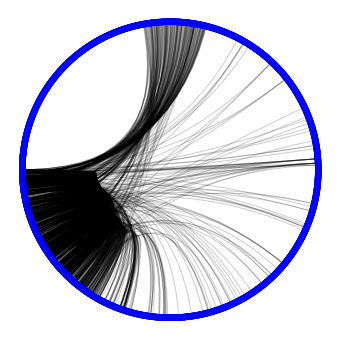

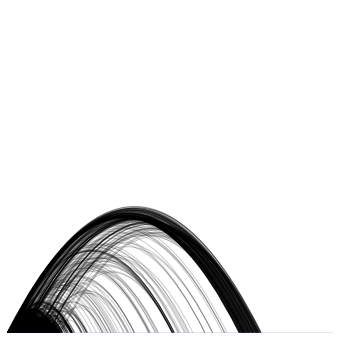

In [57]:
from nxviz import CircosPlot
from nxviz import ArcPlot

Graph = Gs[0]

c = CircosPlot(Graph)
c.draw()
plt.show();

c = ArcPlot(Graph)
c.draw()
plt.show();

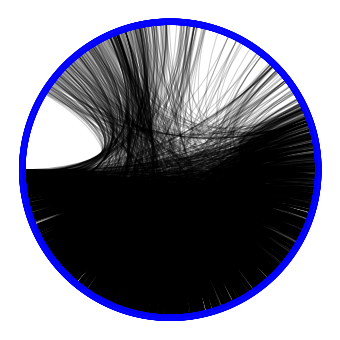

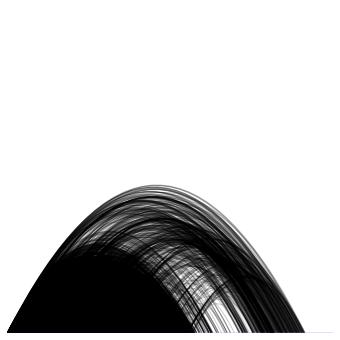

In [58]:
Graph = Gs[1]

c = CircosPlot(Graph)
c.draw()
plt.show();

c = ArcPlot(Graph)
c.draw()
plt.show();

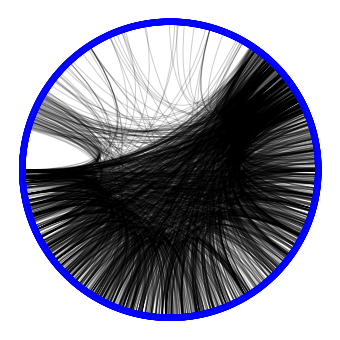

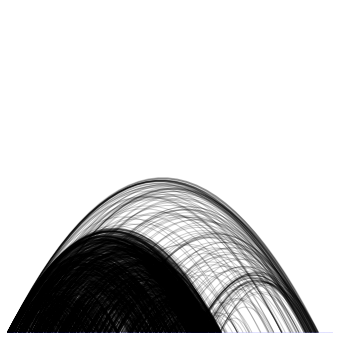

In [59]:
Graph = Gs[2]

c = CircosPlot(Graph)
c.draw()
plt.show();

c = ArcPlot(Graph)
c.draw()
plt.show();

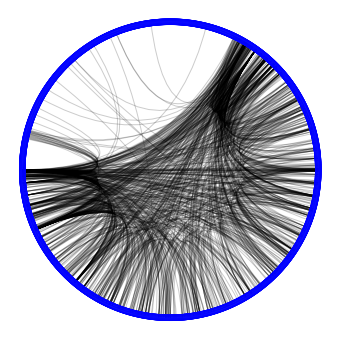

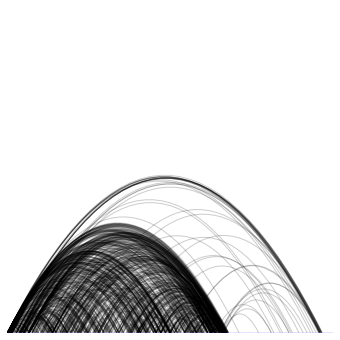

In [60]:
Graph = Gs[3]

c = CircosPlot(Graph)
c.draw()
plt.show();

c = ArcPlot(Graph)
c.draw()
plt.show();

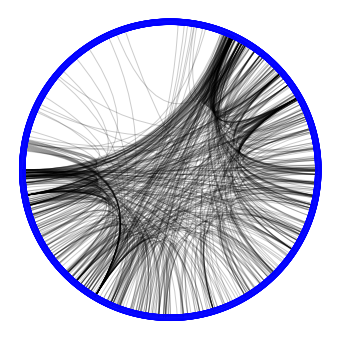

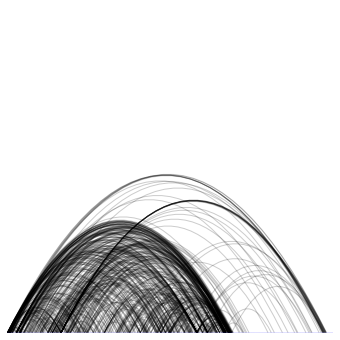

In [61]:
Graph = Gs[4]

c = CircosPlot(Graph)
c.draw()
plt.show();

c = ArcPlot(Graph)
c.draw()
plt.show();

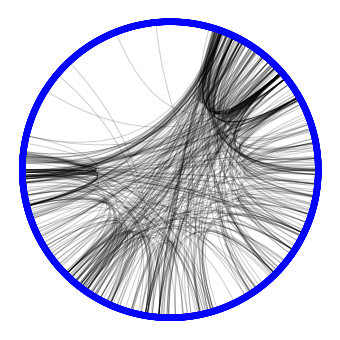

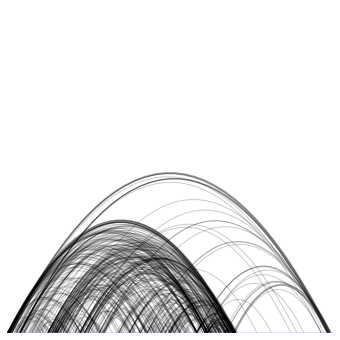

In [62]:
Graph = Gs[5]

c = CircosPlot(Graph)
c.draw()
plt.show();

c = ArcPlot(Graph)
c.draw()
plt.show();

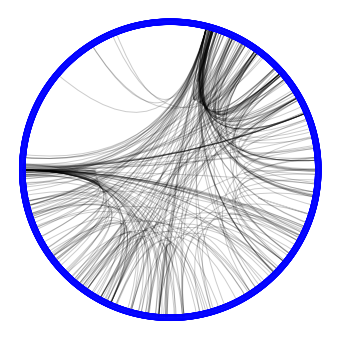

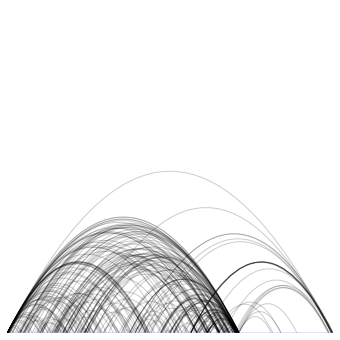

In [63]:
Graph = Gs[6]

c = CircosPlot(Graph)
c.draw()
plt.show();

c = ArcPlot(Graph)
c.draw()
plt.show();

## Plot number of edge changes over time

- Plot the number of edges added over time. To do this:
    - Use a list comprehension to iterate over added and create a list called edges_added. The output expression of the list comprehension is len(g.edges()), where g is your iterator variable.
    - Pass in the edges_added list to ax1.plot().
- Plot the number of edges removed over time. Once again, use a list comprehension, this time iterating over removed instead of added.
- Plot the fractional changes over time by passing it in as an argument to ax2.plot().

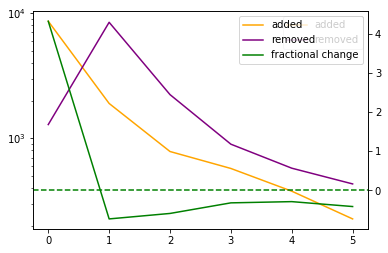

In [64]:
# Import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

# Plot the number of edges added over time
edges_added = [len(g.edges()) for g in added]
plot1 = ax1.plot(edges_added, label='added', color='orange')

# Plot the number of edges removed over time
edges_removed = [len(g.edges()) for g in removed]
plot2 = ax1.plot(edges_removed, label='removed', color='purple')

# Set yscale to logarithmic scale
ax1.set_yscale('log')  
ax1.legend()

# 2nd axes shares x-axis with 1st axes object
ax2 = ax1.twinx()

# Plot the fractional changes over time
plot3 = ax2.plot(fractional_changes, label='fractional change', color='green')

# Here, we create a single legend for both plots
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)
plt.axhline(0, color='green', linestyle='--')
plt.show();

## Evolving graph statistics

<img src="images/graphs224.png" alt="" style="width: 400px;"/>

<img src="images/graphs225.png" alt="" style="width: 400px;"/>

<img src="images/graphs226.png" alt="" style="width: 400px;"/>

<img src="images/graphs227.png" alt="" style="width: 400px;"/>


## Number of edges over time

You're now going to get some practice plotting other **evolving graph statistics**. We'll start with a simpler exercise to kick things off. First off, plot the number of edges over time.

To do this, you'll create a list of the number of edges per month. The index of this list will correspond to the months elapsed since the first month.

In [65]:
# Import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()

Gs

<Figure size 432x288 with 0 Axes>

In [66]:
# Create a list of the number of edges per month
edge_sizes = [len(g.edges()) for g in Gs]
edge_sizes

[1694, 9010, 2470, 1022, 699, 500, 295]

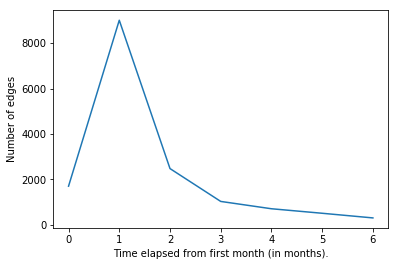

In [67]:
# Plot edge sizes over time
plt.plot(edge_sizes)
plt.xlabel('Time elapsed from first month (in months).') 
plt.ylabel('Number of edges')                           
plt.show();

## Degree centrality over time

Now, you're going to plot the **degree centrality distribution over time**. Remember that the **ECDF** function will be provided, so you won't have to implement it.

In [68]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [69]:
# Import necessary modules
import networkx as nx
import matplotlib.pyplot as plt

# Create a list of degree centrality scores month-by-month
cents = []
for G in Gs:
    cent = nx.degree_centrality(G)
    cents.append(cent)

In [70]:
list(cents[i].values())[:10]

[0.004214963119072708,
 0.0036880927291886192,
 0.0,
 0.0,
 0.0,
 0.005795574288724973,
 0.0031612223393045306,
 0.0,
 0.0,
 0.0]

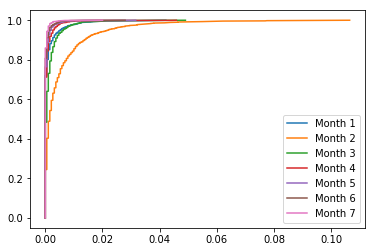

In [71]:
# Plot ECDFs over time
fig = plt.figure()
for i in range(len(cents)):
    x, y = ecdf(list(cents[i].values())) 
    plt.plot(x, y, label='Month {0}'.format(i+1)) 
plt.legend()   
plt.show();

The degree centrality distribution gets smaller over time generally, but nodes in the 2nd month have the highest degree centrality scores overall.

## Find nodes with top degree centralities

In this exercise, you'll `take a deeper dive to see whether there's anything interesting about the most connected students in the network`. First off, you'll find the cluster of students that have the highest degree centralities. This result will be saved for the next plotting exercise.

- Get the top 5 unique **degree centrality** scores. To do this, use the `sorted()` function, in which the first argument is the set of degree centrality values of G (because you want unique degree centralities), and the second argument is `reverse=True`, to ensure that it is sorted in descending order. To limit the results to the top 5 scores, add in appropriate slicing to the end of the statement. Also, remember to use `.values()` on the returned degree centrality results!
- Create list of nodes that have the top 5 highest overall degree centralities. To do this:
    - Iterate over the dictionary of degree centrality scores using the `.items()` method on `nx.degree_centrality(G)`.
    - If dc is in top_dcs, then append the node n to the top_connected list.
- Print the number of nodes that share the top 5 degree centrality scores (top_connected) using `len()`.

In [72]:
nx.degree_centrality(G)[1]

0.0026343519494204425

In [73]:
dict(list(nx.degree_centrality(G).items())[0:5])

{1: 0.0026343519494204425,
 3: 0.020021074815595362,
 5: 0.0,
 6: 0.0,
 8: 0.0005268703898840885}

In [74]:
set(nx.degree_centrality(G).values())

{0.0,
 0.0005268703898840885,
 0.001053740779768177,
 0.0015806111696522653,
 0.002107481559536354,
 0.0026343519494204425,
 0.0031612223393045306,
 0.0036880927291886192,
 0.004214963119072708,
 0.004741833508956796,
 0.005268703898840885,
 0.005795574288724973,
 0.00684931506849315,
 0.0136986301369863,
 0.020021074815595362}

In [75]:
sorted(set(nx.degree_centrality(G).values()))

[0.0,
 0.0005268703898840885,
 0.001053740779768177,
 0.0015806111696522653,
 0.002107481559536354,
 0.0026343519494204425,
 0.0031612223393045306,
 0.0036880927291886192,
 0.004214963119072708,
 0.004741833508956796,
 0.005268703898840885,
 0.005795574288724973,
 0.00684931506849315,
 0.0136986301369863,
 0.020021074815595362]

In [76]:
# Get the top 5 unique degree centrality scores: top_dcs
top_dcs = sorted(set(nx.degree_centrality(G).values()), reverse=True)[0:5]

In [77]:
# Create list of nodes that have the top 5 highest overall degree centralities
top_connected = []
for n, dc in nx.degree_centrality(G).items():
    if dc in top_dcs:
        top_connected.append(n)

In [78]:
# Print the number of nodes that share the top 5 degree centrality scores
print(len(top_connected))

6


## Visualizing connectivity

Here, you're going to `visualize how the connectivity of the top connected nodes changes over time`. The list of top connected values, `top_connected`, from the previous exercise has been loaded.

A `defaultdict` is preferred here as `a regular Python dictionary would throw a KeyError if you try to get an item with a key that is not currently in the dictionary`.

- Initialize a `defaultdict` of empty lists called `connectivity`.
- Iterate over `top_connected` using a for loop, and in the body of this outer for loop, once again iterate over Gs. Inside this nested loop:
    - The keys of connectivity should be the nodes n in top_connected, and the values should be the list of connectivity scores. Therefore, you have to append `len(g.neighbors(n))` to `connectivity[n]`.
- Iterate over connectivity using `.items()` and plot the connectivity of each node by passing in conn to `plt.plot()`.

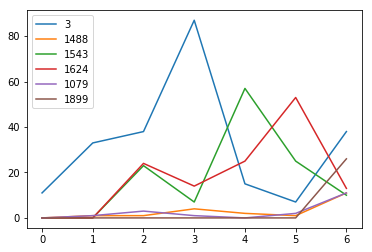

In [79]:
# Import necessary modules
import matplotlib.pyplot as plt
from collections import defaultdict

# Create a defaultdict in which the keys are nodes and the values are a list of connectivity scores over time
connectivity = defaultdict(list)
for n in top_connected:
    for g in Gs:
        connectivity[n].append(len(list(g.neighbors(n))))

# Plot the connectivity for each node
fig = plt.figure() 
for n, conn in connectivity.items(): 
    plt.plot(conn, label=n) 
plt.legend()  
plt.show();

Notice how there seems to be two distinct clusters of nodes that behave slightly differently: nodes 3, 1543 and 1624 are one group, and other nodes are the other. There may be something interesting to investigate going forward!